# Implementation of MCP Neuron for AND and OR Function.

In [ ]:
def MCP_Neurons_AND(X1, X2, T):
    """
    This function implements basic AND operations with MCP Neuron for two inputs.

    Arguments:
    X1 (1D array): An array of binary values (0 or 1).
    X2 (1D array): An array of binary values (0 or 1).
    T (int): Threshold value for the MCP Neuron.

    Returns:
    state_neuron (1D list): A list of neuron states (1 or 0) for the given inputs.
    """
    # Check if the input arrays have the same length
    assert len(X1) == len(X2), "Input arrays must have the same length."

    # Initialize an empty list to store the neuron states
    state_neuron = []

    # Iterate through the input arrays
    for i in range(len(X1)):
        # Calculate the weighted sum of inputs (X1[i] + X2[i])
        weighted_sum = X1[i] + X2[i]

        # Check if the weighted sum is greater than or equal to the threshold
        if weighted_sum >= T:
            state_neuron.append(1)  # Neuron fires (output = 1)
        else:
            state_neuron.append(0)  # Neuron does not fire (output = 0)

    return state_neuron

In [ ]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [ ]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2), "Both input lists must have the same length."

    state_neuron = []  # List to store the output states of the neuron

    for x1, x2 in zip(X1, X2):
        sum_inputs = x1 + x2  # Summing the inputs
        if sum_inputs >= T:    # Checking against the threshold
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

In [ ]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


**Question - 1: What does the shape of X represent?**

-> It Represents the feature matrix

**Question - 2: What does the shape of X represent?**

-> It Represents the label vector

### Viewing the Dataset.

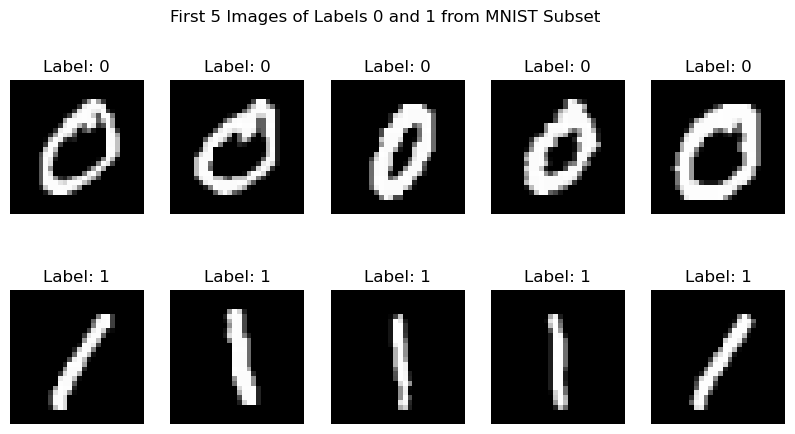

In [ ]:
# Extract images belonging to label 0 and label 1
images_0 = X[y == 0]  # Select all images corresponding to label 0
images_1 = X[y == 1]  # Select all images corresponding to label 1

# Create a figure with a 2-row, 5-column layout for visualization
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Ensure there are at least 5 images for each label before plotting
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to display 5 images.")
else:
    for i in range(5):
        # Display the first 5 images of label 0 in the first row
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")  # Hide axes for better visualization

        # Display the first 5 images of label 1 in the second row
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")  # Hide axes for better visualization

    # Add a title to the entire figure
    plt.suptitle("First 5 Images of Labels 0 and 1 from MNIST Subset")
    plt.show()


## Step - 2 - Initializing the Weights:

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

## Step - 3 - Make a Decision function:

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)  # Step function activation
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [ ]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    n_samples, n_features = X.shape

    for epoch in range(epochs):
        for i in range(n_samples):
            # Select the i-th sample
            x_i = X[i]
            y_i = y[i]

            # Compute the activation (linear combination)
            activation = np.dot(x_i, weights) + bias

            # Apply the step function to get the prediction (0 or 1)
            prediction = 1 if activation >= 0 else 0

            # Update weights and bias if prediction is incorrect
            if prediction != y_i:
                error = y_i - prediction
                weights += learning_rate * error * x_i
                bias += learning_rate * error

    # Calculate the accuracy after training
    activations = np.dot(X, weights) + bias
    predictions = (activations >= 0).astype(int)
    accuracy = np.mean(predictions == y)

    return weights, bias, accuracy

## Training the Perceptron

In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  1.0


## Step 5: Visualize Misclassified Images

In [ ]:
# Compute predictions for all data points using the weight vector and bias
predictions = np.dot(X, weights) + bias

# Apply thresholding to convert predictions into binary class labels (0 or 1)
y_pred = np.where(predictions >= 0, 1, 0)

# Compute the overall classification accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Identify misclassified samples
misclassified_idx = np.where(y_pred != y)[0]

# If there are misclassified samples, visualize up to 10 of them
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    # Display 10 misclassified images
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")


Final Accuracy: 1.0000
All images were correctly classified!


## Task 3: Perceptron Algorithm for 3 vs 5 Classification.

In [ ]:
# Load the dataset
df2 = pd.read_csv("mnist_3_and_5.csv")

# Extract features and labels
X = df2.drop(columns=["label"]).values  # 784 pixels
y = df2["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


Error: Not enough images to plot.


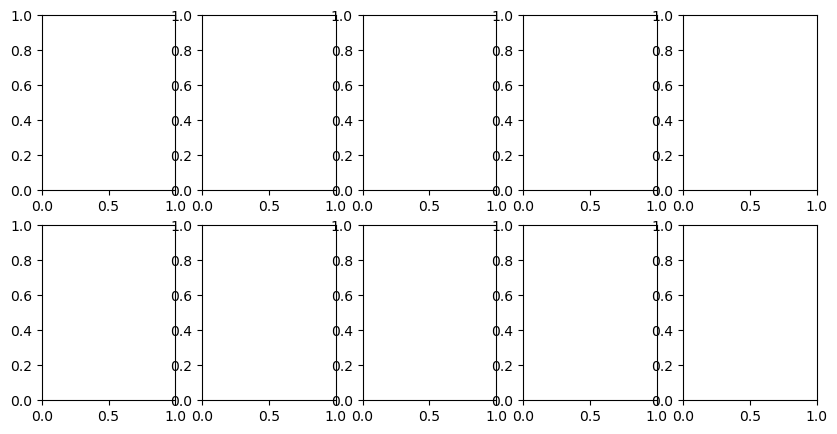

In [ ]:
# Separate images for label 3 (mapped to 0) and 5 (mapped to 1)
images_3 = X[y == 0]  # Images of digit 3
images_5 = X[y == 1]  # Images of digit 5

# Plot the images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
if len(images_3) < 5 or len(images_5) < 5:
    print("Error: Not enough images to plot.")
else:
    for i in range(5):
        # Plot digit 3
        axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")
        # Plot digit 5
        axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()


In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

In [ ]:
def decision_function(X, weights, bias):
    """Compute the predicted labels for the input data."""
    predictions = np.dot(X, weights) + bias
    return np.where(predictions >= 0, 1, 0)  # Step function: 1 if >= 0, else 0

In [ ]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """Train the perceptron using the Perceptron Learning Algorithm."""
    n_samples = X.shape[0]
    for epoch in range(epochs):
        correct_predictions = 0
        for i in range(n_samples):
            # Compute the weighted sum
            z = np.dot(X[i], weights) + bias
            # Apply step function
            y_pred = 1 if z >= 0 else 0
            # Update weights and bias if prediction is wrong
            if y_pred != y[i]:
                update = learning_rate * (y[i] - y_pred)
                weights += update * X[i]
                bias += update
            else:
                correct_predictions += 1
        # Calculate accuracy for this epoch
        accuracy = correct_predictions / n_samples
        # Stop if all predictions are correct
        if correct_predictions == n_samples:
            print(f"Converged at epoch {epoch + 1}")
            break
    return weights, bias, accuracy

In [ ]:
# Train the perceptron
weights, bias, accuracy = train_perceptron(X, y, weights, bias, learning_rate, epochs)
print("The Final Accuracy is:", accuracy)

The Final Accuracy is: 0.0


Final Accuracy: 0.0000


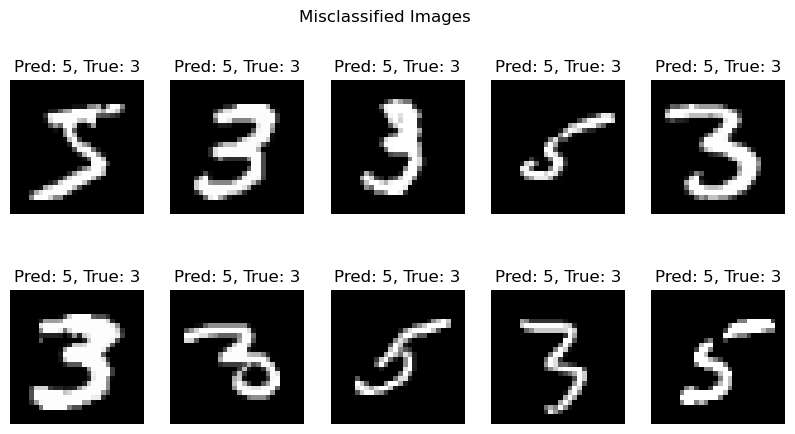

In [ ]:
# Get predictions for all data points
y_pred = decision_function(X, weights, bias)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Find misclassified images
misclassified_idx = np.where(y_pred != y)[0]

# Visualize misclassified images
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show up to 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        # Map predicted and true labels back to 3 and 5 for display
        pred_label = 5 if y_pred[idx] == 1 else 3
        true_label = 5 if y[idx] == 1 else 3
        ax.set_title(f"Pred: {pred_label}, True: {true_label}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")